In [135]:
import numpy as np
import matplotlib.pyplot as plt

define function of $e^{-x}-x$ and specific error of 0.00001

In [136]:
def ExpoNegativeXMinusX(x):
    return np.exp(-x)-x

es = 0.00001

derivative of $e^{-x}-x$ is $-e^{-x}-1$

In [137]:
def DiffExpoNegativeXMinusX(x):
    return -np.exp(-x) -1

# Bracketing Methods

### Bisection Method

In [138]:
def bisection_method(func, xl, xu, es, max_iter = 10000) :

    if func(xl) * func(xu) >= 0 :
        raise ValueError(f"Opposite signs at the interval of [{xl}, {xu}]")
    elif func(xl) == 0 :
        return xl
    elif func(xu) == 0 :
        return xu
    
    iter_count = 0
    errors = []
    xr = 0
    ea = 100
    
    while ea > es and iter_count < max_iter :
        old_xr = xr
        xr = (xl + xu) / 2
        iter_count += 1
        
        if func(xr) == 0 :
            errors.append(0)
            return xr, iter_count, errors
        elif func(xl) * func(xr) < 0 :
            xu = xr
        else :
            xl = xr
            
        if xr is not None :
            ea = abs((xr - old_xr) / xr * 100)
            errors.append(ea)
    
    return xr, iter_count, errors

interval of $[0, 1.3]$ of $e^{-x}-x$ with es of 0.00001

In [139]:
root_bi, iterations_bi, errors_bi = bisection_method(ExpoNegativeXMinusX, 0, 1.3, es)

print(f"Root : {root_bi}")
print(f"Iteration : {iterations_bi}")
print(f"Approximation Errors : {errors_bi}")

Root : 0.5671432882547379
Iteration : 25
Approximation Errors : [100.0, 100.0, 33.333333333333336, 14.28571428571429, 7.692307692307695, 3.7037037037037153, 1.818181818181814, 0.9009009009008891, 0.4484304932735465, 0.22371364653245018, 0.11198208286675698, 0.05595970900952097, 0.02798768541841981, 0.01399188470688176, 0.006995452955574957, 0.003497604141151557, 0.0017487714880335741, 0.0008743933895977201, 0.00043719860620692827, 0.00021859978095127404, 0.00010930000995021603, 5.465003485114263e-05, 2.7325024882351273e-05, 1.3662514298030501e-05, 6.8312576254638785e-06]


### False Position Method

In [140]:
def false_position_method(func, xl, xu, es, max_iter = 10000) :
    
    if func(xl) * func(xu) >= 0 :
        raise ValueError(f"Opposite signs at the interval of [{xl}, {xu}]")
    elif func(xl) == 0 :
        return xl
    elif func(xu) == 0 :
        return xu
    
    iter_count = 0
    errors = []
    xr = 0
    ea = 100
    
    while ea > es and iter_count < max_iter :
        old_xr = xr
        xr = xu - (func(xu) * (xl - xu)) / (func(xl) - func(xu))
        iter_count += 1
        
        if func(xr) == 0 :
            errors.append(0)
            return xr, iter_count, errors
        elif func(xl) * func(xr) < 0:
            xu = xr
        else:
            xl = xr
        
        if xr is not None :
            ea = abs((xr - old_xr) / xr) * 100
            errors.append(ea)
            
    return xr, iter_count, errors

interval of $[0, 1.3]$ of $e^{-x}-x$ with es of 0.00001

In [141]:
root_fp, iterations_fp, errors_fp = false_position_method(ExpoNegativeXMinusX, 0, 1.3, es)

print(f"Root : {root_fp}")
print(f"Iteration : {iterations_fp}")
print(f"Approximation Errors : {errors_fp}")

Root : 0.5671432921242093
Iteration : 9
Approximation Errors : [np.float64(100.0), np.float64(11.453044893027078), np.float64(1.277010144852476), np.float64(0.14205586036043172), np.float64(0.01579792061008576), np.float64(0.0017568179487634187), np.float64(0.00019536737475019613), np.float64(2.1725868623933377e-05), np.float64(2.4160295213826726e-06)]


# Open Methods

### Newton-Raphson Method

In [142]:
def newton_raphson_method(func, func_diff, xi, es, max_iter = 10000) :
    
    iter_count = 0
    errors = []
    
    ea = 100
    
    while ea > es and iter_count < max_iter :
        old_xi = xi
        xi = xi - func(xi)/func_diff(xi)
        iter_count += 1
        
        if func(xi) == 0:
            errors.append(0)
            return xi, iter_count, errors
        
        if xi is not None:
            ea = abs((xi - old_xi)/ xi) *100
            errors.append(ea)
            
    return xi, iter_count, errors

interval of $[0, 1.3]$ of $e^{-x}-x$ and derivative is $-e^{-x}-1$ with es of 0.00001

In [143]:
root_nr, iterations_nr, errors_nr = newton_raphson_method(ExpoNegativeXMinusX, DiffExpoNegativeXMinusX, 0, es)

print(f"Root : {root_nr}")
print(f"Iteration : {iterations_nr}")
print(f"Approximation Errors : {errors_nr}")

Root : 0.567143290409784
Iteration : 5
Approximation Errors : [np.float64(100.0), np.float64(11.709290976662396), np.float64(0.14672870783743905), np.float64(2.2106391984397623e-05), np.float64(5.08968352942999e-13)]


### Secant Method

In [144]:
def secant_method(func, xi, old_xi, es, max_iter = 10000) :
    
    iter_count = 0
    errors = []
    ea = 100
    
    while ea > es and iter_count < max_iter :
        xi_next = xi - (func(xi) * (old_xi - xi)) / (func(old_xi) - func(xi))
        iter_count += 1
        
        old_xi = xi
        xi = xi_next
        
        if func(xi) == 0 :
            errors.append(0)
            return xi, iter_count, errors
        
        if xi is not None :
            ea = abs((xi - old_xi) / xi) * 100
            errors.append(ea)
            
    return xi, iter_count, errors

start with $x_i = 0$ and es of 0.00001

In [145]:
root_sc, iterations_sc, errors_sc = secant_method(ExpoNegativeXMinusX, 0, -1, es)

print(f"Root : {root_sc}")
print(f"Iteration : {iterations_sc}")
print(f"Approximation Errors : {errors_sc}")

Root : 0.5671432904097835
Iteration : 6
Approximation Errors : [np.float64(100.0), np.float64(32.4321186383904), np.float64(3.856448534378175), np.float64(0.14842403197744974), np.float64(0.0006138459046437218), np.float64(9.391237394610106e-08)]


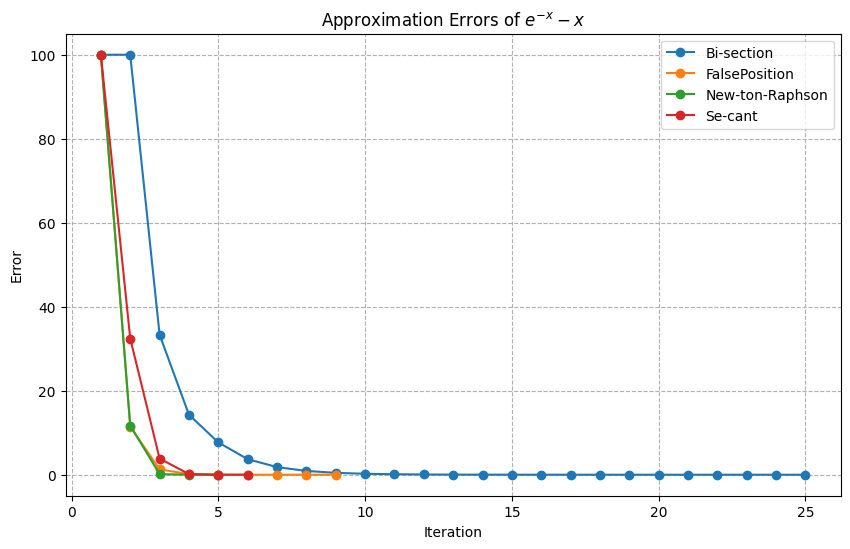

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors_bi) + 1), errors_bi, marker="o", label="Bisection")
plt.plot(range(1, len(errors_fp) + 1), errors_fp, marker="o", label="FalsePosition")
plt.plot(range(1, len(errors_nr) + 1), errors_nr, marker="o", label="Newton-Raphson")
plt.plot(range(1, len(errors_sc) + 1), errors_sc, marker="o", label="Secant")
plt.title("Approximation Errors of $e^{-x}-x$")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()